In [24]:
index_exp = 2

In [25]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [27]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [28]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Finish reading Experiment!


In [29]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Case142_Eact_Neg_kcr_Ds_per") # for Linux
# Reload all scans  
Big_start = 1; Big_end = 10; case_no=10;
purpose_i = "Case142_Eact_Neg_kcr_Ds_per"


In [7]:
workbook = openpyxl.Workbook() 
sheet = workbook.active  
excel_name = f"Summary of Case142_Eact_Neg_kcr_Ds"
sheet_title = "Summary" 
sheet.title = sheet_title
workbook.save(BasicPath+f"/{excel_name}.xlsx" )

In [ ]:
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()

# check whether all cases succeed, if so, it should contains a png file start with 0_Scan
def Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i):
    # List all files in the folder 
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    target_folder = BasicPath + Target
    #print(target_folder)
    files = os.listdir(target_folder)
    # Check if any file matches the criteria
    Flag_all_succeed = False
    for file_name in files:
        if file_name.endswith('.png') and '0_Scan' in file_name:
            Flag_all_succeed = True
            break
    if Flag_all_succeed:
        print(f"All cases succeed from {Scan_start} to {Scan_end}")
    else:
        print(f"Some cases failed from {Scan_start} to {Scan_end}")
    return Flag_all_succeed

def Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,dpi,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath +Target 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    #axs[0].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    #axs[1].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    fig.suptitle(
        f"0_Scan {index_list[0]}-{index_list[-1]}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + Target +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

def Collect_1case_Excel(Scan_start,Scan_end,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    Index_List_succeed = Indexs+1
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    sheet_name_xlsx = 'Output';
    for k,index_i in enumerate(Index_List_succeed):
        #print(index_i)
        try:
            old_book = str(index_i) + '_' + book_name_xlsx
            #print(old_book)
            #open excel:
            data_old = openpyxl.load_workbook(
                BasicPath + Target +   "Excel/" + old_book)   
            data_tar = openpyxl.load_workbook(
                BasicPath + Target+   book_name_xlsx) 

            table_old = data_old[str(index_i)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            table_tar = data_tar[sheet_name_xlsx]
            nrows_tar = table_tar.max_row # ncolumns_old + k +1 # Mark!!! Most important changes!
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)
            
            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                    for j in range(1, len(list_old[i-1])+1):
                        #print(i,j,list_old[i-1][j-1]    )
                        table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(
                BasicPath + Target
                + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {index_i}!")
        else:
            print(f"Successfuly write results for Scan {index_i}!") 
    return

# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i):
    # Open the source workbook
    #    purpose = "Latin_6para_200cases_narrow"
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath +Target
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"/{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"/{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Flag_all_succeed = Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i)
    if Flag_all_succeed:
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)
    else:
        # first, plot summary
        Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,100,purpose_i)
        # then collect single cases into a summary of the 10 cases
        Collect_1case_Excel(Scan_start,Scan_end,purpose_i)
        # finally, collect the 10 cases into a bigger file
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

In [31]:
Scan_start = 11; Scan_end= 19
#Collect_1case_Excel(Scan_start,Scan_end,purpose_i)
Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

Successfully collect Case_11_19


In [9]:
# tidy up the 1000 cases - delete the rows with "Unknown" - should upgrade in the future to keep 
""" from openpyxl import load_workbook
workbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")
sheet = workbook.active
# Convert rows to a list and iterate over it in reverse order
rows = list(sheet.iter_rows(values_only=True))
for row in reversed(range(len(rows))):
    if "Unknown" in rows[row]:
        sheet.delete_rows(row + 1)  # Delete the row
workbook.save(filename=BasicPath+f"{excel_name}.xlsx") """

' from openpyxl import load_workbook\nworkbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")\nsheet = workbook.active\n# Convert rows to a list and iterate over it in reverse order\nrows = list(sheet.iter_rows(values_only=True))\nfor row in reversed(range(len(rows))):\n    if "Unknown" in rows[row]:\n        sheet.delete_rows(row + 1)  # Delete the row\nworkbook.save(filename=BasicPath+f"{excel_name}.xlsx") '

In [10]:
# replot everything:
if not os.path.exists(BasicPath + "/Plots_collect"):
   os.mkdir(BasicPath + "/Plots_collect");
if not os.path.exists(BasicPath + "/Plots_collect/Allscans"):
   os.mkdir(BasicPath + "/Plots_collect/Allscans");

# cre
def Plot_summary2(Scan_start,Scan_end,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + Target
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[0,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[0,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[1,0].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[1,1].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
            axs[1,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
                np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"Scan {index_list[0]}-{index_list[-1]}"
        +"Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"/Plots_collect/Allscans/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Plot_summary2(Scan_start,Scan_end,dpi=300)
    

/tmp/ipykernel_21192/2528704776.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


In [32]:
# Post-processing - using ML knowledge
# Read the Excel file into a DataFrame
result_df = pd.read_excel(BasicPath+"/Summary of Case142_Eact_Neg_kcr_Ds.xlsx")
result_df


,Scan No,Exp No.,Y or N,Error Tot%,Error SOH %,Error LLI %,Error LAM NE %,Error LAM PE %,Error Res %,Error ageT %,...,LLI to LiP,LLI to SEI,LLI to sei-on-cracks,LAM to Neg,LAM to Pos,Vol_Elely_Tot Final,Vol_Elely_JR Final,Width Final,Error,Unnamed: 54
0,1,2,Fail,3.06,1.64,2.98,2.81,1.21,2.09,7.64,...,0.000090,0.024850,0.089820,0.359825,0.459187,4.451790,4.451790,1.480678,Empty,Empty
1,2,2,Pass,2.98,1.26,2.16,1.09,0.65,8.10,4.56,...,0.000089,0.022767,0.085346,0.337773,0.431045,4.486898,4.486898,1.486765,Empty,Empty
2,3,2,Pass,2.35,2.24,3.10,1.84,0.41,0.93,2.94,...,0.000096,0.025869,0.092439,0.372186,0.474962,4.432181,4.432181,1.477265,Empty,Empty
3,4,2,Pass,2.27,0.29,1.47,1.61,0.66,4.67,6.88,...,0.000091,0.037788,0.117621,0.501498,0.639982,4.229562,4.229562,1.441572,Empty,Empty
4,5,2,Pass,1.89,0.31,0.74,0.13,0.77,6.04,4.29,...,0.000089,0.034681,0.111375,0.468185,0.597470,4.281272,4.281272,1.450767,Empty,Empty
5,6,2,Pass,1.55,0.55,1.53,0.59,0.94,3.45,2.80,...,0.000096,0.038859,0.120125,0.514481,0.656551,4.209549,4.209549,1.437988,Empty,Empty
6,7,2,Pass,2.95,1.25,0.34,0.66,1.41,7.13,6.32,...,0.000091,0.048559,0.139418,0.621452,0.793060,4.046007,4.046007,1.408461,Empty,Empty
7,8,2,Pass,2.38,1.56,0.51,0.99,1.53,4.12,4.04,...,0.000090,0.044533,0.131584,0.577016,0.736353,4.113509,4.113509,1.420726,Empty,Empty
8,9,2,Pass,2.02,0.87,0.27,0.49,1.92,5.79,2.67,...,0.000098,0.049497,0.141555,0.633354,0.808249,4.028132,4.028132,1.405175,Empty,Empty
9,10,2,Pass,2.00,0.21,1.18,0.33,0.65,6.70,4.38,...,0.000089,0.030990,0.103547,0.427820,0.545958,4.344381,4.344381,1.461909,Empty,Empty


In [25]:
column_mapping = {
    "SEI growth activation energy [J.mol-1]":"Eact",
    "Ageing temperature":"T",
}
# Rename the columns using the mapping   - Error_1~6;   Para_1~8
result_df = result_df.rename(columns=column_mapping)

In [43]:
ranked_rows = result_df.sort_values(by='Error Tot%')
ranked_rows = ranked_rows[ranked_rows['Error Tot%'] < 5]
selected_short = ranked_rows[["Scan No","Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap Loss","LLI to LiP","LLI to SEI","LAM to Neg","LAM to Pos",
    "Width Final"]]
column_mapping = {
    "Ageing temperature":"T",  
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
}
selected_short = selected_short.rename(
    columns=column_mapping)
selected_short.to_excel(BasicPath+'/selected_rows2.xlsx', index=False)

In [38]:
selected_rows = pd.DataFrame()
for i in range(1, 200):
    selected_row_i = pd.DataFrame()
    if (i in result_df['Scan No'].values) and ((200 + i) in result_df['Scan No'].values) and ((400 + i) in result_df['Scan No'].values):
        selected_row_i = result_df[result_df['Scan No'].isin([i, 200 + i, 400 + i])]
        selected_rows = pd.concat([selected_rows, selected_row_i])
        #print(i)
selected_rows['Cap_loss/Punish'] = selected_rows['Cap Loss'] * selected_rows['Punish']
selected_short = selected_rows[["Scan No","Ageing temperature","Punish",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap_loss/Punish"]]
column_mapping = {
    "Ageing temperature":"T",
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
}
selected_short = selected_short.rename(
    columns=column_mapping)
print(selected_short)
selected_short.to_excel(BasicPath+'/selected_rows.xlsx', index=False)

     Scan No   T  Punish          Dint         Decay         k_LiP     V_sei   
0          1  10       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122  \
180      201  25       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122   
373      401  40       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122   
1          2  10       1  2.841765e-19  1.109752e-09  4.068245e-10  0.000138   
181      202  25       1  2.841765e-19  1.109752e-09  4.068245e-10  0.000138   
..       ...  ..     ...           ...           ...           ...       ...   
361      389  25       1  3.550322e-18  1.867914e-08  1.722623e-09  0.000085   
491      589  40       1  3.550322e-18  1.867914e-08  1.722623e-09  0.000085   
174      191  10       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   
363      391  25       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   
492      591  40       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   

         Eact_SEI  Cap_loss/Punish  
0 

In [ ]:
#
import json

# plot inside the function:
def Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi):

    All_Scans = {}
    selected_rows = result_df[result_df['Scan No']==Selected]
    index_exp = selected_rows["Exp No."]
    index_exp = int(index_exp.iloc[0])
    Temp = selected_rows['Ageing temperature']
    Temp = float(Temp.iloc[0])
    scan = Selected
    Scan_start = ((scan - 1) // 10) * 10 + 1
    Scan_end = Scan_start + 9 
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    Target  = f'/{purpose}/'
    model_options = selected_rows['Model option']
    model_options = str(model_options.iloc[0])
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True) 
    #try:
    with open( 
        BasicPath +  Target +  "Mats/" + str(scan)
        + "-StructData.json") as file:
        All_Scans[str(scan)] = json.load(file)
    axs[0,0].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]['CDend SOH [%]'],     
        '-o', label="Scan=" + str(scan) )
    axs[0,1].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]["CDend LLI [%]"],'-o', label="total LLI")
    if model_options.__contains__("lithium plating"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
    if model_options.__contains__("SEI"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
    if model_options.__contains__("SEI on cracks"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
    axs[0,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
    axs[1,0].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
    axs[1,1].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
    axs[1,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
        np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', ) 
    #except:
    #    print("Load .mat fail")
    #else:
    #    pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temp))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0,0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[0,1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[0,2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[1,0].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[1,1].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
        axs[1,2].plot(
            chThr_temp[1:],
            np.array(df["Age set average temperature (degC)"][1:]).astype(float),
            color=color_exp,marker=marker_exp,)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    
    axs[0,0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[0,1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[0,2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[1,0].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[1,1].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[1,2].plot(
        X_1_st[1:],Y_6_st_avg[1:],
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    #print(index_exp)
    fig.suptitle(
        f"{Str_1}-Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-0_Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}degC Summary.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return

Selected = 235; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 253; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 312; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)


In [22]:
selected_rows = result_df[result_df['Scan No']==1]

#index_exp = 2
Selected =4
selected_rows = result_df[result_df['Scan No']==Selected]
index_exp = selected_rows["Exp No."]
index_exp = int(index_exp.iloc[0])
index_exp

2

2


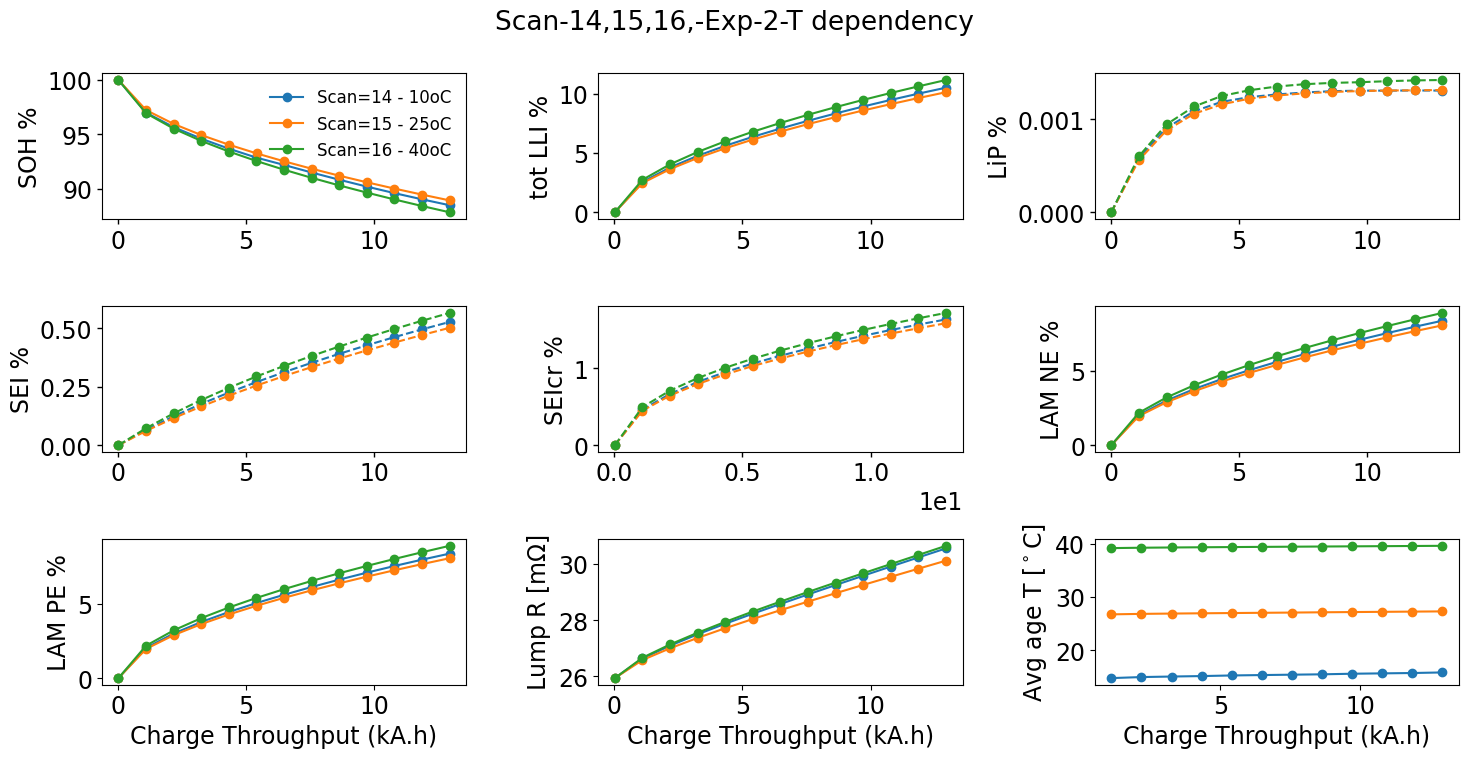

In [34]:
import json
def Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,Scan_end_end,
    purpose_i,Str_1,BasicPath,fs,dpi): # Scan_end_end is the end for all scans

    fig, axs = plt.subplots(3,3, figsize=(15,7.8),tight_layout=True) 
    def Plot_one_scan(result_df,Selected,purpose_i):
        All_Scans = {}
        selected_rows = result_df[result_df['Scan No']==Selected]
        index_exp = selected_rows["Exp No."]
        index_exp = int(index_exp.iloc[0])
        Temp = selected_rows['Ageing temperature']
        Temp = float(Temp.iloc[0])
        scan = Selected
        Scan_start = ((scan - 1) // 10) * 10 + 1
        if Scan_start + 9 > Scan_end_end:
            Scan_end = Scan_end_end
        else:
            Scan_end = Scan_start + 9 
        purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
        Target  = f'/{purpose}/'
        model_options = selected_rows['Model option']
        model_options = str(model_options.iloc[0])
        #try:
        with open( 
            BasicPath +  Target +  "Mats/" + str(scan)
            + "-StructData.json") as file:
            All_Scans[str(scan)] = json.load(file)
        axs[0,0].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]['CDend SOH [%]'],     
            '-o', label=f"Scan={str(scan)} - {str(int(Temp))}oC")
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI [%]"],'-o', )
        if model_options.__contains__("lithium plating"):
            axs[0,2].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
        if model_options.__contains__("SEI"):
            axs[1,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
        if model_options.__contains__("SEI on cracks"):
            axs[1,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
        axs[1,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
        axs[2,0].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
        axs[2,1].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
        axs[2,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
            np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', )
        return  
    #except:
    for Selected in Selected_all:
        Plot_one_scan(result_df,Selected,purpose_i)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("tot LLI %")
    axs[0,2].set_ylabel("LiP %")
    axs[1,0].set_ylabel("SEI %")
    axs[1,1].set_ylabel("SEIcr %")
    axs[1,2].set_ylabel("LAM NE %")
    axs[2,0].set_ylabel("LAM PE %")
    axs[2,1].set_ylabel(r"Lump R [m$\Omega$]")
    axs[2,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[2,0].set_xlabel("Charge Throughput (kA.h)")
    axs[2,1].set_xlabel("Charge Throughput (kA.h)")
    axs[2,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)
    #axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    print(index_exp)
    fig.suptitle(
        f"{Str_1}-Exp-{index_exp}-T dependency", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-Exp-{index_exp}-T dependency.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return
dpi=300; Scan_end_end = 19
Selected_all = [14,15,16]; Str_1 = f"Scan-{Selected_all[0]},{Selected_all[1]},{Selected_all[2]},"
Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,Scan_end_end,
    purpose_i,Str_1,BasicPath,fs,dpi)

2


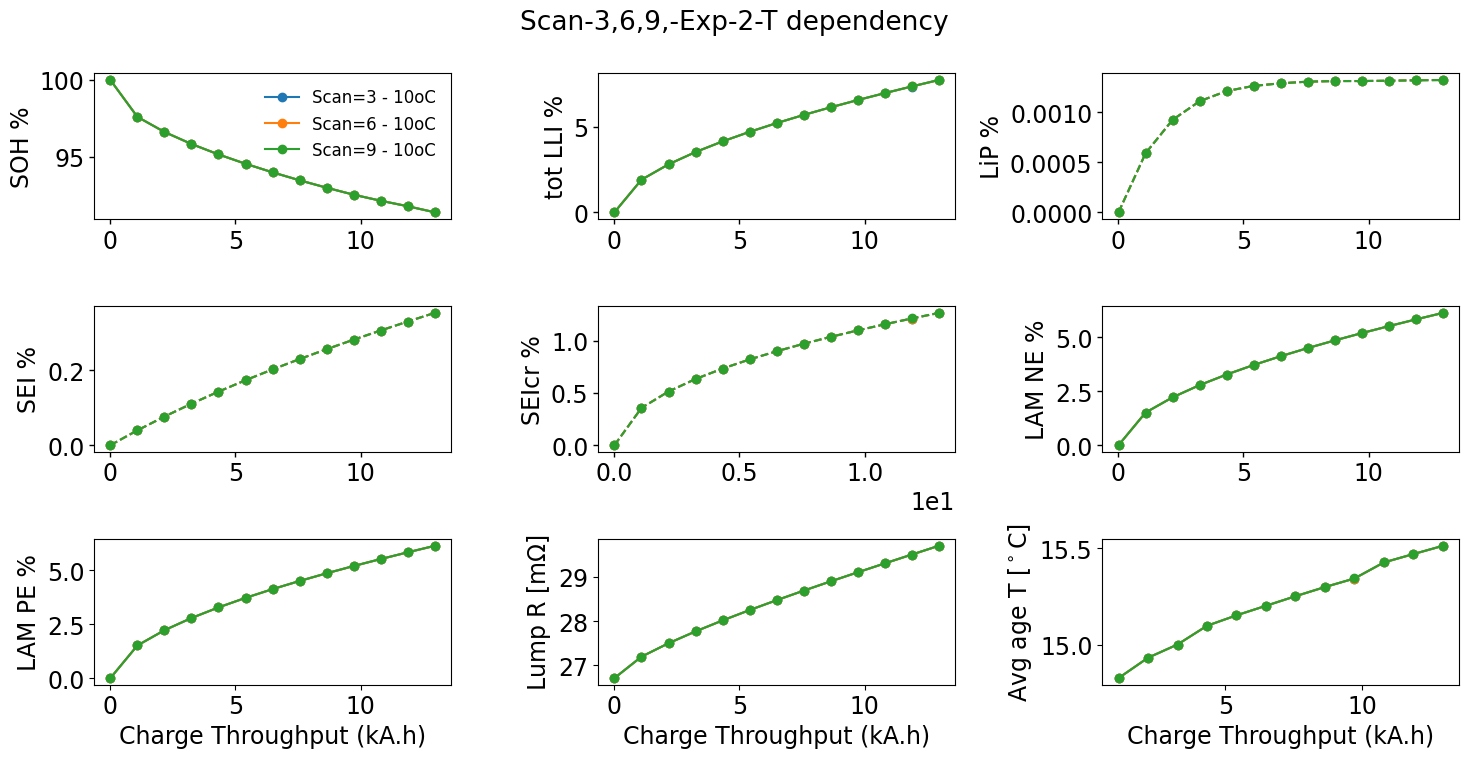

In [73]:
selected  =9; dpi=300
Selected_all = [3,6,9]; Str_1 = f"Scan-{Selected_all[0]},{Selected_all[1]},{Selected_all[2]},"
Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,
    purpose_i,Str_1,BasicPath,fs,dpi)